In [1]:
#Import the necessary libraries
import numpy as np
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
# #Use the requests library to download the ZIP file and save it to your local machine
# import requests
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"
# response = requests.get(url)
# open("smsspamcollection.zip", "wb").write(response.content)

# #Next, use the zipfile library to unzip the file and extract the desired file
# import zipfile
# zip_ref = zipfile.ZipFile("smsspamcollection.zip", "r")
# zip_ref.extractall()
# zip_ref.close()

#Finally, use the pandas read_csv function to load the extracted file into a pandas dataframe
df = pd.read_csv("SMSSpamCollection", sep='\t', names=['Label', 'Message'])


In [3]:
df.describe()

,Label,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [4]:
df

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
pd.options.display.max_colwidth = 1000
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [6]:
df["Label"].value_counts()

Label
ham     4825
spam     747
Name: count, dtype: int64

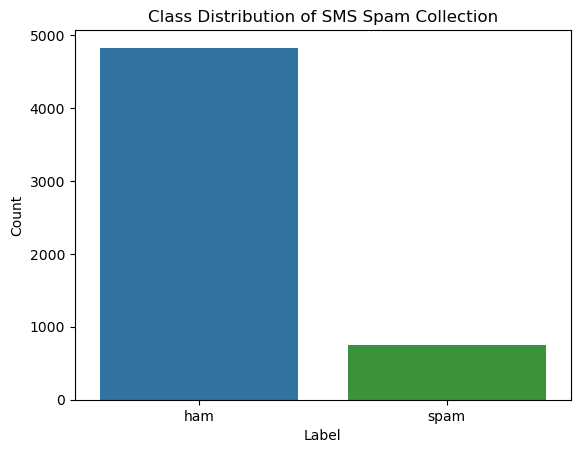

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the color palette for the plot
palette = sns.color_palette(["#1f77b4", "#2ca02c"])
# Plot the class distribution using seaborn's countplot function
sns.countplot(x="Label", data=df, palette=palette)

# Add title and labels to the plot
plt.title("Class Distribution of SMS Spam Collection")
plt.xlabel("Label")
plt.ylabel("Count")

# Display the plot
plt.show()

In [8]:
# Check for null values in a specific column
#print(df['Label'].isnull().any())

# Check for null values in all columns
#print(df.isnull().any())

# Count the number of null values in a specific column
#print(df['Label'].isnull().sum())

# Count the number of null values in all columns
print(df.isnull().sum())


Label      0
Message    0
dtype: int64


In [9]:
# Check for duplicates
print(df.duplicated().any())

True


In [10]:
# Remove duplicates
df = df.drop_duplicates()

By default, drop_duplicates() will keep the first occurrence of a duplicate row and remove all subsequent occurrences. You can specify the keep parameter to specify which occurrences of duplicates to keep. For example, keep='first' will keep the first occurrence and remove all others (the default behavior), while keep='last' will keep the last occurrence and remove all others.

You can also specify the subset parameter to only consider a subset of columns when checking for duplicates. For example, df.drop_duplicates(subset=['col1', 'col2']) will only consider the col1 and col2 columns when checking for duplicates.

In [11]:
# Count the number of samples for each class
class_counts = df.groupby('Label').size()

print(class_counts)


Label
ham     4516
spam     653
dtype: int64


In [12]:
#use the normalize parameter to get the relative frequencies of each class, rather than the counts
df['Label'].value_counts(normalize=True)

Label
ham     0.87367
spam    0.12633
Name: proportion, dtype: float64

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])

C:\Users\hotpr\AppData\Local\Temp\ipykernel_19884\2370706985.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'] = le.fit_transform(df['Label'])


In [14]:
df['Label'].value_counts()

Label
0    4516
1     653
Name: count, dtype: int64

In [15]:
X = df['Message']
y = df['Label']

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# # Reshape the x_train array to 1D
# x_train = x_train.reshape(-1)
# # Reshape the x_train array to 1D
# x_test = x_test.reshape(-1)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)
# X_test = vectorizer.transform(x_test)


In [17]:
import numpy as np
from imblearn.over_sampling import RandomOverSampler

# Reshape the input array from 1D to 2D
# X = np.array(X).reshape(-1, 1)

oversample = RandomOverSampler(sampling_strategy='minority')
X, y = oversample.fit_resample(X, y)

# Count the number of samples for each class after oversampling
y.value_counts()

Label
0    4516
1    4516
Name: count, dtype: int64

In [18]:
#80% of data were used for training and 20% for testing purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

we can convert words to vectors using either Count Vectorizer or by using TF-IDF Vectorizer.

TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

# Classifying using sklearn's pre-built classifiers
In this step we will use some of the most popular classifiers out there and compare their results.

## Classifiers used:
spam classifier using logistic regression  
email spam classification using Support Vector Machine(SVM)  
spam classifier using naive bayes  
spam classifier using decision tree  
spam classifier using K-Nearest Neighbor(KNN)  
spam classifier using Random Forest Classifier  
We will make use of sklearn library. This amazing library has all of the above algorithms we just have to import them and it is as easy as that. No need to worry about all the maths and statistics behind it.

In [19]:
# #import sklearn packages for building classifiers
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import f1_score

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
                             confusion_matrix, balanced_accuracy_score, cohen_kappa_score)
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

In [21]:
# classifiers = {
#     'Logistic Regression': LogisticRegression(random_state=42),
#     'k-Nearest Neighbors': KNeighborsClassifier(),
#     'Naive Bayes': MultinomialNB(),
#     'Decision Tree': DecisionTreeClassifier(random_state=42),
#     'Support Vector Machines - Linear': LinearSVC(dual=False),
#     'Random Forest': RandomForestClassifier(random_state=42),
#     'Extra Trees Classifier': ExtraTreesClassifier(random_state=42),
#     'Light Gradient Boosting Machine': LGBMClassifier(random_state=42),
#     'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=42),
#     'AdaBoost Classifier': AdaBoostClassifier(random_state=42),
#     'XGBoost Classifier': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
#     'Ridge Classifier': RidgeClassifier(random_state=42),
# }

# voting_classifier = VotingClassifier(estimators=list(classifiers.items()), voting='hard')
# classifiers['Voting Classifier'] = voting_classifier


# # Calculate metrics for each classifier
# metrics = []

# for name, classifier in classifiers.items():
#     classifier.fit(X_train, y_train)
#     y_pred = classifier.predict(X_test)

#     accuracy = accuracy_score(y_test, y_pred)
#     #balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)
#     cohen_kappa = cohen_kappa_score(y_test, y_pred)
    
#     metrics.append([name, accuracy, precision, recall, f1, cohen_kappa])

# # Print metrics in a table
# metrics_df = pd.DataFrame(metrics, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Cohen Kappa'])
# print(metrics_df)

In [22]:
# create and train the Best Classifier from the one above
from sklearn.naive_bayes import MultinomialNB
# classifier = VotingClassifier(estimators=list(classifiers.items()), voting='hard').fit(X_train, y_train)
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
print(y_pred)

[0 1 1 ... 0 1 1]


In [23]:
# Evaluating the model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_test)
print(classification_report(y_test, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(y_test, pred))
print("Accuracy: \n", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       899
           1       0.99      0.98      0.98       908

    accuracy                           0.98      1807
   macro avg       0.98      0.98      0.98      1807
weighted avg       0.98      0.98      0.98      1807


Confusion Matrix: 
 [[890   9]
 [ 21 887]]
Accuracy: 
 0.9833978970669618


In [24]:
# make predictions on the test set
predictions = classifier.predict(X_test)

# create a data frame with the true labels and predictions
results = pd.DataFrame({
    "True Label": y_test,
    "Prediction": predictions
})

# create a column for the evaluation of the predictions
#results["Evaluation"] = np.where((results["True Label"] == "ham") & (results["Prediction"] == "ham"), "TN",
                                 #np.where((results["True Label"] == "spam") & (results["Prediction"] == "spam"), "TP",
                                 #np.where((results["True Label"] == "ham") & (results["Prediction"] == "spam"), "FP", "FN")))


In [25]:
results

,True Label,Prediction
2373,0,0
8209,1,1
8993,1,1
5239,1,1
6013,1,1
...,...,...
8722,1,1
1281,0,0
971,0,0
8584,1,1


In [32]:
new_email = input("Enter the text of the new email: ")
new_email_vector = vectorizer.transform([new_email])
prediction = classifier.predict(new_email_vector)
threshold = 0.5


if prediction >= threshold:
    print("The email is classified as spam.")
else:
    print("The email is classified as ham.")


Enter the text of the new email: I hope you are all doing well. I just wanted to remind you all that there will be a game night tonight at the chapel from 8-10 p.m. There will be snacks and soda provided. If you are going to Regi and don't want to dance the whole night, you should totally come by or if you aren't going to Regi but want to have some fellowship then please come. Feel free to invite friends. It's meant to be a chill time to hang out and play some fun games. Have a great day everyone.
The email is classified as ham.


In [27]:
new_email = input("Enter the text of the new email: ")
new_email_vector = vectorizer.transform([new_email])
probabilities = classifier.predict_proba(new_email_vector)

if probabilities[0][1] >= threshold:
    print("The email is classified as spam with probability", probabilities[0][1])
else:
    print("The email is classified as ham with probability", probabilities[0][0])


Enter the text of the new email: Congrats!! rodionpedyuk: You're the winner of the brand new 𝗛𝗮𝗿𝗯𝗼𝗿 𝗣𝗿𝗲𝘀𝘀𝘂𝗿𝗲 𝗪𝗮𝘀𝗵𝗲𝗿 ID:079199
The email is classified as spam with probability 0.871647838899353


You might have accidentally used another model to replace it

In [28]:
probabilities 

array([[0.12835216, 0.87164784]])

In [30]:
import joblib

# Save the model to a file
model_filename = "SpamModel.joblib"
joblib.dump(classifier, model_filename)


['SpamModel.joblib']